In [1]:
import numpy as np
from sklearn.datasets import fetch_california_housing

In [2]:
dataset = fetch_california_housing()

In [3]:
x = dataset.data
y = dataset.target

## Lineare Regression

### Bedeutung

-   $R^2$: Wie viel Streuung kann von dem Regressionsmodell erklärt werden
-   coef: Steigung der Geraden
-   intercept: y-Achsenabschnitt

### Symbole

-   $\hat{y}$: Prediktion vom Modell

### Datensatz

-   $N$: Anzahl an Samples
-   $F$: Anzahl an Features
-   $x$: Input-Daten (Features)
-   $y$: Output Daten (Targets)

### Variablen

-   $x \in \mathbb{R}^{N,F}$
-   $y \in \mathbb{R}^{N}$
-   coef, $\bar{x} \in \mathbb{R}^{F}$
-   intercept, $\bar{y} \in \mathbb{R^1}$

### Formeln

-   $\beta = (X^TX)^{-1}X^Ty$
-   coef = $\beta$\[1:\]
-   intercept = $\beta$\[0\]
-   $\hat{y} = X\beta$
-   $R^2 = 1 - \frac{\sum_{i=1}^n(y_i-\hat{y})^2}{\sum_{i=1}^n(y_i-\bar{y})^2}$

### Shapes

-   inner: $(F,N) * (N,F) => (F,F)$
-   inv: (F,F)$^{-1}$ => (F,F)
-   inner2: (F,F) \* (F,N) => (F,N)
-   $\beta$: (F,N) \* (N,1) => (F,1)


In [4]:
from sklearn.metrics import r2_score

In [5]:
class LinearRegression:
    def __init__(self, use_intercept: bool = True) -> None:
        self.coef_: np.ndarray = None
        self.intercept_: np.ndarray = None
        self.use_intercept = use_intercept

    def _add_intercept(self, x: np.ndarray) -> np.ndarray:
        intercepts = np.ones(shape=(x.shape[0]))
        x = np.column_stack((intercepts, x))
        return x

    def fit(self, x: np.ndarray, y: np.ndarray) -> None:
        if self.use_intercept:
            x = self._add_intercept(x)
        inner = np.dot(x.T, x)
        inv = np.linalg.inv(inner)
        inner2 = np.dot(inv, x.T)
        beta = np.dot(inner2, y)
        self.intercept_ = beta[0]
        self.coef_ = beta[1:]

    def predict(self, x: np.ndarray) -> None:
        y_pred = x * self.coef_ + self.intercept_
        return y_pred

    def score(self, x: np.ndarray, y: np.ndarray) -> None:
        y_pred = self.predict(x)
        return r2_score(y, y_pred)

In [6]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [7]:
x = dataset.data[:, [0]]
y = dataset.target

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3)

In [8]:
regr = LinearRegression()
regr.fit(x_train, y_train)
r2 = regr.score(x_test, y_test)

print(f"r2: {r2}")
print(f"m: {regr.coef_}")
print(f"b: {regr.intercept_}")

r2: 0.4786309945079352
m: [0.41835896]
b: 0.45107693482040284


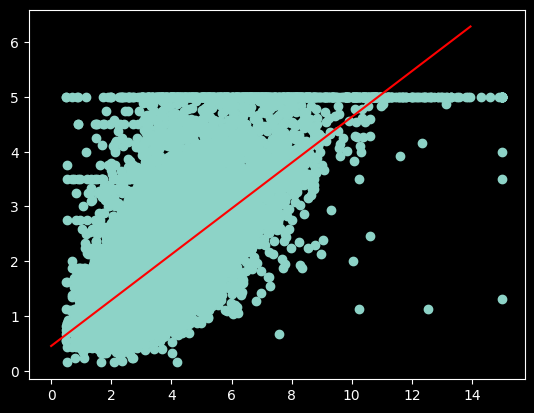

In [9]:
x_values = np.arange(start=0.0, stop=14.0, step=0.05).reshape((-1, 1))
y_values = regr.predict(x_values)

plt.scatter(x_train, y_train)
plt.plot(x_values, y_values, color="red")
plt.show()